# your goal is to achieve a model with a consistent R2 and only statistically significant parameters across multiple samples

In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [2]:
# Grab and process the raw data.
# Grab and process the raw data.
# data_path = ("known_offenses_nyc2013.csv")
data_path = ("NewYork2014.csv")


In [3]:
# data_raw = pd.read_csv(data_path)

data_raw = pd.read_csv(open('NewYork2014.csv','rU'), encoding='utf-8', engine='c')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
data_raw

,City,Population,ViolentCrime,Murder,Rape (revised definition)1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,VehicleTheft,Arson3,Unnamed: 13
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0,NaN
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0,NaN
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0,NaN
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0,NaN
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0,NaN
5,Albion Village4,"5,872",26,0.0,3,NaN,2,21,204,41,159,4,0.0,NaN
6,Alexandria Bay Village4,"1,107",0,0.0,0,NaN,0,0,7,2,5,0,0.0,NaN
7,Alfred Village4,"4,032",11,1.0,1,NaN,0,9,30,6,24,0,0.0,NaN
8,Altamont Village4,"1,723",1,0.0,0,NaN,0,1,2,2,0,0,0.0,NaN
9,Amherst Town4,"118,860",128,1.0,16,NaN,43,68,"2,066",176,"1,846",44,2.0,NaN


In [5]:
data_raw['pop_num'] = pd.to_numeric(data_raw['Population'].str.replace(',',''))
data_raw['pop_squared']=data_raw['pop_num']**2
data_raw['Murder_Cat'] = np.where((data_raw['Murder'] > 0),1,0)

In [6]:
data_raw['robbery_num'] = pd.to_numeric(data_raw['Robbery'].str.replace(',',''))
data_raw['robbery_cat'] = np.where((data_raw['robbery_num'] > 0),1,0)

In [7]:
data_raw.dtypes

City                             object
Population                       object
ViolentCrime                     object
Murder                          float64
Rape\n(revised\ndefinition)1     object
Rape2                           float64
Robbery                          object
AggravatedAssault                object
PropertyCrime                    object
Burglary                         object
LarcenyTheft                     object
VehicleTheft                     object
Arson3                          float64
Unnamed: 13                     float64
pop_num                         float64
pop_squared                     float64
Murder_Cat                        int64
robbery_num                     float64
robbery_cat                       int64
dtype: object

In [8]:
data_raw['Burglary'] = pd.to_numeric(data_raw['Burglary'].str.replace(',',''))

In [9]:
data_raw['ViolentCrime'] = pd.to_numeric(data_raw['ViolentCrime'].str.replace(',',''))
data_raw['LarcenyTheft'] = pd.to_numeric(data_raw['LarcenyTheft'].str.replace(',',''))
data_raw['VehicleTheft'] = pd.to_numeric(data_raw['VehicleTheft'].str.replace(',',''))

In [10]:
data_raw.dtypes

City                             object
Population                       object
ViolentCrime                    float64
Murder                          float64
Rape\n(revised\ndefinition)1     object
Rape2                           float64
Robbery                          object
AggravatedAssault                object
PropertyCrime                    object
Burglary                        float64
LarcenyTheft                    float64
VehicleTheft                    float64
Arson3                          float64
Unnamed: 13                     float64
pop_num                         float64
pop_squared                     float64
Murder_Cat                        int64
robbery_num                     float64
robbery_cat                       int64
dtype: object

In [11]:
data_numeric = data_raw[:-7]

In [12]:
data_numeric

,City,Population,ViolentCrime,Murder,Rape (revised definition)1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,VehicleTheft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
0,Adams Village,"1,851",0.0,0.0,NaN,0.0,0,0,11,1.0,10.0,0.0,0.0,NaN,1851.0,3.426201e+06,0,0.0,0
1,Addison Town and Village,"2,568",2.0,0.0,NaN,0.0,1,1,49,1.0,47.0,1.0,0.0,NaN,2568.0,6.594624e+06,0,1.0,1
2,Afton Village4,820,0.0,0.0,0,NaN,0,0,1,0.0,1.0,0.0,0.0,NaN,820.0,6.724000e+05,0,0.0,0
3,Akron Village,"2,842",1.0,0.0,NaN,0.0,0,1,17,0.0,17.0,0.0,0.0,NaN,2842.0,8.076964e+06,0,0.0,0
4,Albany4,"98,595",802.0,8.0,54,NaN,237,503,"3,888",683.0,3083.0,122.0,12.0,NaN,98595.0,9.720974e+09,1,237.0,1
5,Albion Village4,"5,872",26.0,0.0,3,NaN,2,21,204,41.0,159.0,4.0,0.0,NaN,5872.0,3.448038e+07,0,2.0,1
6,Alexandria Bay Village4,"1,107",0.0,0.0,0,NaN,0,0,7,2.0,5.0,0.0,0.0,NaN,1107.0,1.225449e+06,0,0.0,0
7,Alfred Village4,"4,032",11.0,1.0,1,NaN,0,9,30,6.0,24.0,0.0,0.0,NaN,4032.0,1.625702e+07,1,0.0,0
8,Altamont Village4,"1,723",1.0,0.0,0,NaN,0,1,2,2.0,0.0,0.0,0.0,NaN,1723.0,2.968729e+06,0,0.0,0
9,Amherst Town4,"118,860",128.0,1.0,16,NaN,43,68,"2,066",176.0,1846.0,44.0,2.0,NaN,118860.0,1.412770e+10,1,43.0,1


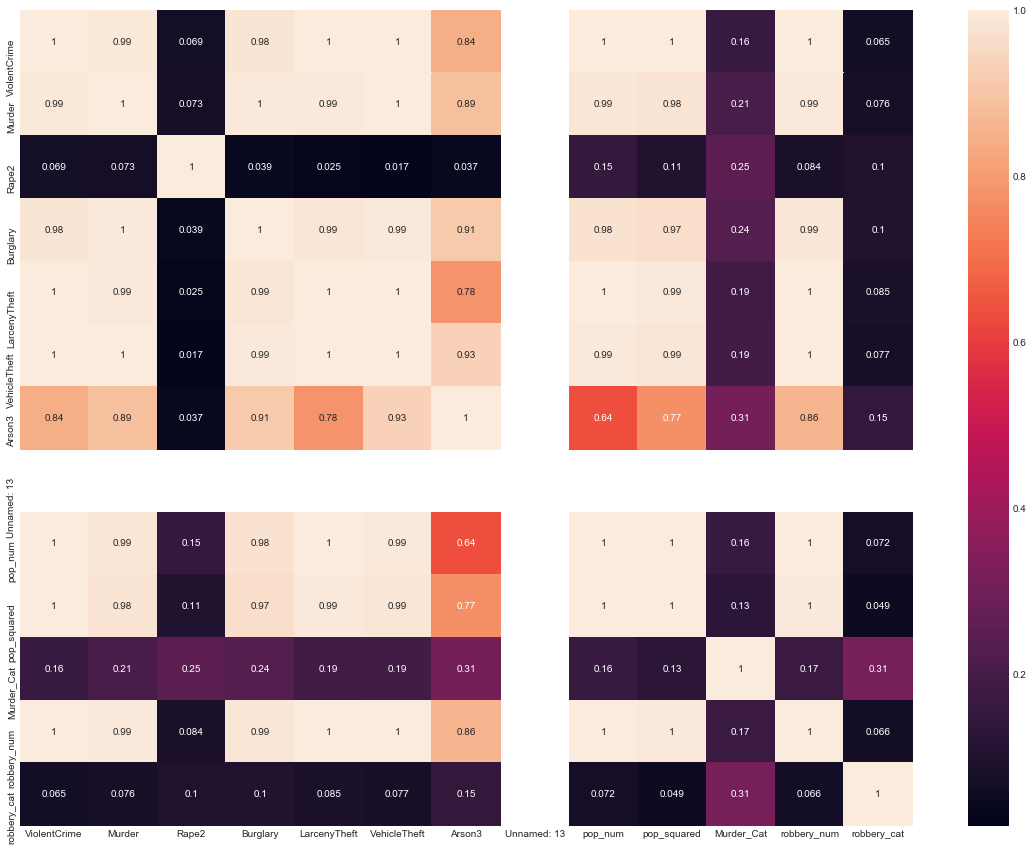

In [13]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_numeric.corr(), annot=True)

In [ ]:
# Time to try the linear regression
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PropertyCrime ~ pop_num+Murder_Cat+AggravatedAssault'

In [ ]:
# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data_raw).fit()

In [ ]:
lm.params

In [ ]:
lm.pvalues

# High R^2 values, low pvalues (< .05)- the model holds

In [ ]:
lm.rsquared

In [ ]:
lm.conf_int()

In [ ]:
# Population and AggravatedAssault have fairly narrow confidence intervals
# Let's pull Muder_Cat out and do this again... except for the fact that Murder_Cat is independent and correlative
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [ ]:
# Time to try the linear regression
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PropertyCrime ~ pop_num+AggravatedAssault+ViolentCrime'

In [ ]:
# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data_raw).fit()

In [ ]:
lm.params

In [ ]:
lm.pvalues

In [ ]:
lm.rsquared

# Still a decent R^2 value
# New confidence intervals:

In [ ]:
lm.conf_int()

# ... at least the new confidence intervals for AggravatedAssault are a bit slimmer

In [ ]:
# Population and AggravatedAssault have fairly narrow confidence intervals
# Let's pull Muder_Cat out and do this again... except for the fact that Murder_Cat is independent and correlative
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [ ]:
# Not really sure how or what to cross validate

In [ ]:
# What should data be??? make new df or a .loc for pop_num+Murder_Cat+AggravatedAssault
data = review_raw[keywords]
target = data_numeric['PropertyCrime']

# data = review_raw[keywords]
# target = review_raw['good_rating']

# from linear regression import .... examples
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [ ]:
# Test your model with different holdout groups.
# Took out random seed of 20

# note: might need to pivot [-1:1]
# target may need to be flipped/pivoted

# bring in linear regression

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
# x train is the input to the expression, y-train is the propertycrime output
X_train, X_test, y_train, y_test = train_test_split(data_numeric, target, test_size=0.2)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))